# Analysis of the paths 


The analysis is made under the assumption that people are doing their best when playing.
- Extraction of the length of the paths
    - TO DO:
        - Reduce computational power (Hashing, code improvement,...)
        - Average  
            
            
- Reproduction of the optimal path, or inspiration or use of https://www.sixdegreesofwikipedia.com/
    - TO DO: (This task is going to be the thoughest, seems quite difficult but feasible.)
        - Implement a local version of the website (Many optimal paths possible)
            - Creation of the SQLITE database
            - Running of the local website 
        
        
- Comparison to the optimal one (Most important part of the analysis) 
    - TO DO: (Once optimal paths are found) 
        - Apply the comparison, extract the deviations from the optimal path
        
             
- Extraction of the most important categories (HUBs)
    - TO DO:
        - From deviations, towards which category are people drawn ? Link with the influence of the environment cf.Emilien
        - Apply to optimal paths, which category contains the most informations ? Link with position of the links cf. Christophe

### Goals of P2
- Get acquainted with data
- preprocess it
- complete descriptive statistics tasks 
***
### Expectations
- Pipeline in place
- Documentend notebook
- Show clear project goals
### Exemples of what we should show: 
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

        

In [1]:
#Import of the library
import numpy as np
import csv
import urllib.parse
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm import trange

## Data Reading
***
### Matrix of shortest path
In order to compare average users paths with the optimal ones.

In [2]:
#%%timeit -r 1 -n 1

# Actually the matrix might not be needed, might skip this step 
number_of_words = 4604
with open("DATA/wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt", "r") as f:
    shortest_distance_matrix = np.zeros((number_of_words,number_of_words))
    for i in range(17):
        f.readline()
    for i, line in enumerate(f) :
        line = line.strip('\n')
        for j, number in enumerate(line):
            if number == '_': #replacing impossible paths with nans
                number = np.nan
            else:
                number = int(number)
            shortest_distance_matrix[i,j] = number


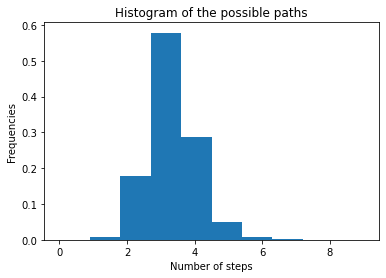

Mean of shortest paths: 3.2
Median: 3.2
Frequence of impossible paths: 0.12 


In [3]:
d1_shortest_matrix = np.reshape(shortest_distance_matrix ,-1)
plt.hist(d1_shortest_matrix, bins = 10, density = True)
plt.xlabel("Number of steps")
plt.ylabel("Frequencies")
plt.title("Histogram of the possible paths")
plt.show()
print("Mean of shortest paths: %.1f" % (np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)])))
print("Median: %.1f" % np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)]))
print("Frequence of impossible paths: %.2f " %
      (len(d1_shortest_matrix[np.isnan(d1_shortest_matrix)])/len(d1_shortest_matrix)))

### Articles dataset
In order to associate path with names as the shortest path matrix in the same order as articles.

We use the library urllib.parse in order to decode from URL.

By using %%timeit, we notice a notable time difference in execution time when decoding from URL. 

We decide not to decode it straightaway but only when it is necessary (when we need to know the name of the article) as it is for now not necessary to decode the URL encoding for the names of the articles. 

In [4]:
#%%timeit -r 1 -n 1

with open("DATA/wikispeedia_paths-and-graph/articles.tsv", "r", newline = '\n') as f:
    articles = [None]*number_of_words
    articles_decoded = [None]*number_of_words
    for i in range(12):
        f.readline()
    for i, line in enumerate(f):
        articles_decoded[i] = urllib.parse.unquote(line.strip('\n')) #Decoding 
        articles[i] = line.strip('\n')

In [5]:
count = 0
for i in range(number_of_words):
    if articles[i] != articles_decoded[i]:
        count += 1
print("Fraction of the encoded words: %.2f" % (count/number_of_words))
    

Fraction of the encoded words: 0.08


### Website testing
We make tests to see if the website is in adequation with our datas.
https://www.sixdegreesofwikipedia.com/

In [6]:
#Raw cell as it was just to make tests
a= np.where(shortest_distance_matrix==8)
b = np.where(np.isnan(shortest_distance_matrix))
print("Example of article where minimum distance == 8")
print(articles[a[0][0]])
print(articles[a[1][0]])
print("\n")
print("Example of article where minimum distance doesn't exist")
print(articles[b[0][-1]])
print(articles[b[1][-1]])

Example of article where minimum distance == 8
16_Cygni
Timken_1111


Example of article where minimum distance doesn't exist
Zulu
Zara_Yaqob


For both of those examples, the website finds examples that are either shorter or existant. This makes sense as our datas are  only constituted of ~4600 articles, whereas theirs of ~6 million articles. 

One option is to reproduce the website code based on our datas.
- https://github.com/jwngr/sdow/blob/master/.github/CONTRIBUTING.md
- https://github.com/jwngr/sdow/blob/master/docs/data-source.md
- https://github.com/jwngr/sdow/blob/master/scripts/create_mock_databases.py

Based on the above links this option seems very plausible. 

A second option is to create our own optimal path algorithm.

### 'paths finished' data
In order to analyze the players behaviour

In [7]:
import pandas as pd 
paths_finished = pd.read_csv("DATA/wikispeedia_paths-and-graph/paths_finished.tsv", 
                             sep = '\t', skiprows = 16, usecols = [3], names = ['paths'])

### Categories data
In order to infer a categorie favored by the players.

Many articles have several categories, some have none. 

There's 129 categories

Max is subject.Countries with 229
Min is subject.Art.Artists with 2
Median is at 27
Mean is at 40
Categories ranked by number of article they contain:

                                                    article
category                                                   
subject.Countries                                       229
subject.Science.Biology.Birds                           161
subject.Geography.Geography_of_Great_Britain            124
subject.Science.Chemistry.Chemical_elements             119
subject.Science.Biology.Mammals                         114
...                                                     ...
subject.Geography.Antarctica                              8
subject.People.Chemists                                   8
subject.People.Producers_directors_and_media_fi...        8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2

[129 rows x 1 columns]


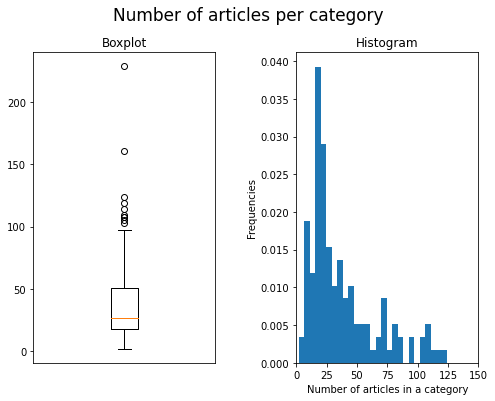

In [8]:
categories = pd.read_csv("DATA/wikispeedia_paths-and-graph/categories.tsv",
                         sep = '\t', skiprows = 13, names = ['article', 'category'])
#print(nb_by_cat)

nb_by_cat = categories.groupby('category').count()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
fig.tight_layout(pad = 5)
fig.suptitle('Number of articles per category', fontsize = 17)

ax[1].hist(nb_by_cat, bins = 50, density = True)
ax[0].boxplot(nb_by_cat)
ax[1].set_title("Histogram")
ax[0].set_title("Boxplot")
ax[1].set_xlabel('Number of articles in a category')
ax[1].set_ylabel('Frequencies')
ax[0].set_xticks([])
ax[1].set_xlim([0,150])

print("There's %d categories\n" % len(nb_by_cat))
print("Max is %s with %d\nMin is %s with %d\nMedian is at %d\nMean is at %d" % 
      (nb_by_cat['article'].idxmax(), max(nb_by_cat['article']),nb_by_cat['article'].idxmin(), 
       min(nb_by_cat['article']),nb_by_cat['article'].median(), nb_by_cat['article'].mean()))


pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
print("Categories ranked by number of article they contain:\n")
print(nb_by_cat.sort_values('article', ascending = False))

### Hashing implementation
****
In order to reduce the computation time of the analysis of the paths, hashing will be interessant,


In [9]:
## HASHING 
#To be finished
def hash_function(key):
    return sum(index * ord(character) for index, character in enumerate(repr(key), start=1))

for i, art in enumerate(articles_decoded):
    if i in np.arange(1,4604,1000):
        print(art)
        print(hash_function(art))

Åland
2568
Comoros
4229
Honey_bee
5984
Noam_Chomsky
10089
Tarragon
5095


### Analysis of the paths
***
When we look for certains user's paths length average, we want to get the index of the intial and final words to obtain the comparison with optimal length. 

Assuming we ignore when they go back.

The words need to be accessible for later

In [ ]:
#While hashing not finish, we write our results in a .csv in order to get them more quickly 

def paths_to_csv(step):
    with open('DATA/paths_finished.csv', 'w') as f:
        len_paths = [0]*len(paths_finished)
        header = ['index_initial', 'index_final','length', 'path']
        writer = csv.writer(f)
        writer.writerow(header)
        for j in trange(0,len(paths_finished),step):
        
            each_word_list = paths_finished['paths'][j].replace(';<;', '').split(';') #Replace to ignore when they go back
            
            index_initial = np.nan
            index_final = np.nan
            
            for i, art in enumerate(articles):
                if each_word_list[0] == art:
                    index_initial = i
                elif each_word_list[-1] == art:
                    index_final = i
                elif not np.isnan(index_final) and not np.isnan(index_initial):
                    break 
                    
            to_write = [index_initial, index_final, len(each_word_list)]
            for word in each_word_list:
                to_write.append(word)
            writer.writerow(to_write)
    return 0


grandeur = paths_to_csv(1)   
    
    
    #print("Beginning: %s \t End: %s" % (each_word[0], each_word[-1]))
    #print("Length of the path: %15d" % int(len(each_word)))
    #print("Length of the optimal path: %7d"  % shortest_distance_matrix[index_initial, index_final])

In [14]:
with open('DATA/paths_finished.csv', 'r') as f:
    arr = np.array([])
    f.readline()
    k = 0
    for i in range(10): 
        if f.readline == "":
            break 
        else: 
            a = f.readline()
            print(a)
        
        
        
        

10,143,14th_century,15th_century,16th_century,Pacific_Ocean,Atlantic_Ocean,Accra,Africa,Atlantic_slave_trade,African_slave_trade

10,143,14th_century,Europe,Africa,Atlantic_slave_trade,African_slave_trade

10,143,14th_century,Niger,Nigeria,British_Empire,Slavery,Africa,Atlantic_slave_trade,African_slave_trade

10,1793,14th_century,Renaissance,Ancient_Greece,Greece

10,2266,14th_century,Italy,Roman_Catholic_Church,HIV,Ronald_Reagan,President_of_the_United_States,John_F._Kennedy

10,2266,14th_century,Europe,North_America,United_States,President_of_the_United_States,John_F._Kennedy

10,1511,14th_century,China,Gunpowder,Fire

10,3425,14th_century,Time,Isaac_Newton,Light,Color,Rainbow

10,3425,14th_century,Time,Light,Rainbow

10,3425,14th_century,15th_century,Plato,Nature,Ultraviolet,Color,Rainbow



In [ ]:
print(arr[0:10])

NameError: name 'len_paths' is not defined

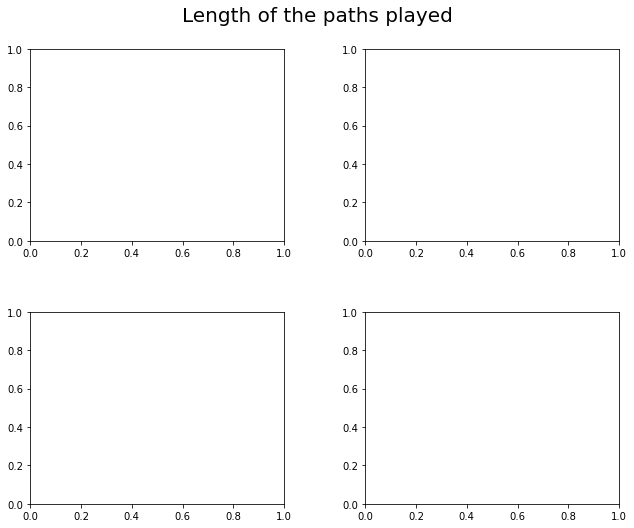

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (10, 8))
fig.tight_layout(pad = 5)
fig.suptitle('Length of the paths played', fontsize = 20)

ax[0,0].hist(len_paths, bins = 10, density = True)
ax[0,1].hist(np.log10(len_paths), bins = 50, density = True )
ax[1,0].boxplot(len_paths)
ax[1,1].boxplot(np.log10(len_paths))
ax[0,0].set_title("Histogram of lengths")
ax[0,1].set_title("Histogram of log-lengths")
ax[1,0].set_title("Boxplot of lengths")
ax[1,1].set_title("Boxpot of log-lengths")

ax[0,0].set_xlabel('Number of articles in a category')
ax[0,0].set_ylabel('Frequencies')
ax[1,0].set_xticks([])
ax[1,1].set_xticks([]);

print("Max %f" % max(paths_finished) )

51318
